In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/voice-assistant-failures.csv")

data.head()

,PID,Failure_Type,Failure_Source,User,Voice_Assistant,Context,Failure_freq,Survey,age,gender,Native_English,accent,adjust_speech,repeat_speech,race,device,device_write_in,Frequency
0,1,Response,Action execution: no action,"Voice Assistant, what is the temperature outside?","She lights up and nothing happens. Ask again, ...",I use Voice Assistant to control the thermosta...,Most of the time I use it,y,35-44,Woman,Yes,No,Every time I use it,Every time I use it,White,"Mobile phone,Smart home device without a visua...",NaN,2-3 times a week
1,1,Attention,Missed Trigger,Voice Assistant turn off.,She ignores and does nothing for several attemps.,One of those stupid Buick ads comes on and act...,Most of the time I use it,NaN,35-44,Woman,Yes,No,Every time I use it,Every time I use it,White,"Mobile phone,Smart home device without a visua...",NaN,2-3 times a week
2,1,Attention,Missed Trigger,Voice Assistant set a timer for 10 minutes.,Voice Assistant didn't respond.,Asking Voice Assistant to get a timer.,Every time I use it,y,35-44,Woman,Yes,No,Every time I use it,Every time I use it,White,"Mobile phone,Smart home device without a visua...",NaN,2-3 times a week
3,2,Attention,Spurious Trigger,"[While talking to coworker] ""Can you share you...",[Responding to your conversation with your co-...,I was having a conference call with my team an...,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Understanding,No understanding,"Voice Assistant, wake up the twins.","""Sorry, I don't know that."" [However, the rout...",I was trying to run a routine to wake up my kids.,About half the time I use it,y,35-44,Man,Yes,No,Sometimes,Sometimes,White,"Mobile phone,Smart home device without a visua...",NaN,Daily


In [2]:
# Define the generator function
def define_generator(latent_dim, n_outputs):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

# Define the discriminator function
def define_discriminator(n_inputs):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the GAN function
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Generate real samples
def generate_real_samples(data, n_samples):
    idx = np.random.randint(0, data.shape[0], n_samples)
    X = data.iloc[idx].values
    y = np.ones((n_samples, 1))
    return X, y

# Generate fake samples
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = np.random.randn(n_samples, latent_dim)
    X = generator.predict(x_input)
    return X

# Train the GAN model
def train_gan(gan_model, generator, discriminator, data, latent_dim, n_epochs=50, n_batch=32):
    for i in range(n_epochs):
        # Generate real samples
        X_real, y_real = generate_real_samples(data, n_batch//2)
        # Generate fake samples
        X_fake = generate_fake_samples(generator, latent_dim, n_batch//2)
        # Train the discriminator
        discriminator.train_on_batch(X_real, y_real)
        discriminator.train_on_batch(X_fake, np.zeros((n_batch//2, 1)))  # Update labels for fake samples
        # Generate points in latent space as input for the generator
        X_gan = np.random.randn(n_batch, latent_dim)
        # Create labels for the fake samples
        y_gan = np.ones((n_batch, 1))
        # Update the generator via the discriminator's error
        gan_model.train_on_batch(X_gan, y_gan)

# Define parameters
latent_dim = 10
n_samples = 1000

# Generate synthetic data using GAN
generator = define_generator(latent_dim, data.shape[1])
discriminator = define_discriminator(data.shape[1])
gan_model = define_gan(generator, discriminator)
train_gan(gan_model, generator, discriminator, data, latent_dim)



1/1 [==============================] - 0s 19ms/step


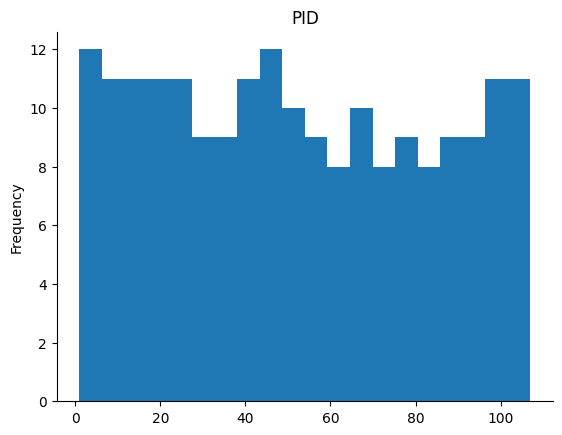

In [5]:
data['PID'].plot(kind='hist', bins=20, title='PID')
plt.gca().spines[['top', 'right',]].set_visible(False)

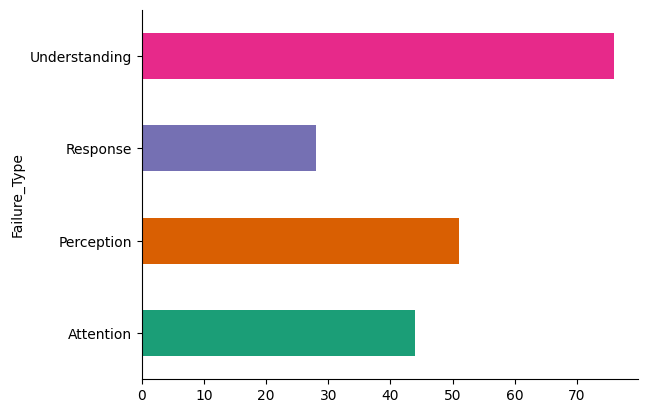

In [2]:
#Failure_Type
data.groupby('Failure_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)